In [1]:
import numpy
from scipy import stats
import pandas

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [3]:
dataset = pandas.read_csv(f'data\Anscombe.csv')
print(dataset)

    x1     y1  x2    y2  x3     y3  x4     y4
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89


In [4]:
reduced_dataset = pandas.DataFrame({'x': dataset['x1'],'y': dataset['y1']})
reduced_dataset

,x,y
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


In [5]:
x = reduced_dataset['x'].to_numpy()
y = reduced_dataset['y'].to_numpy()

In [6]:
M = numpy.stack((x, y), axis=0)
numpy.cov(M)

array([[11.        ,  5.501     ],
       [ 5.501     ,  4.12726909]])

Text(0, 0.5, 'y')

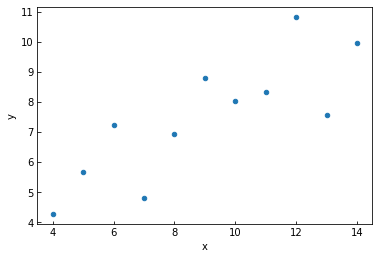

In [10]:
fig = pyplot.figure()
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')


#ax.scatter(x, y)
dataset.plot(x='x1',y='y1',kind='scatter',ax=ax)

ax.set_xlabel('x')
ax.set_ylabel('y')

In [8]:
print("x: ", stats.shapiro(x))
print("y: ", stats.shapiro(y))

x:  ShapiroResult(statistic=0.9683912992477417, pvalue=0.8698423504829407)
y:  ShapiroResult(statistic=0.9769276976585388, pvalue=0.9466750621795654)


In [11]:
r, _ = stats.pearsonr(x, y)
print(r)

0.81642051634484


In [12]:
regression = LinearRegression()
x_reg = x.reshape(-1, 1)
y_reg = y.reshape(-1,1)

In [13]:
regression.fit(x_reg, y_reg)
a = regression.intercept_[0]
b = regression.coef_[0][0]
print(f"y = {a} + {b}x")

y = 3.0000909090909094 + 0.5000909090909093x


In [14]:
y_estimated = a + b*x_reg

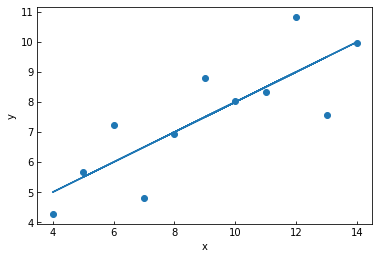

In [15]:
fig = pyplot.figure()
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(x_reg, y_reg)
ax.plot(x_reg, y_estimated)

In [16]:
r_squared = stats.pearsonr(x, y)[0]**2
print("Pearson r squared: ", r_squared)
r_squared = regression.score(x_reg, y_reg)
print("Sklearn r squared: ", r_squared)

Pearson r squared:  0.6665424595087752
Sklearn r squared:  0.6665424595087748


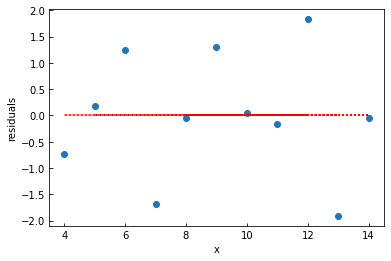

In [17]:
residuals = y_reg - y_estimated # calculate the residuals

fig = pyplot.figure() # generate and format our figure
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')
ax.set_xlabel('x')
ax.set_ylabel('residuals')

ax.scatter(x_reg, residuals) # plot the residuals

xaxis = numpy.zeros_like(x_reg)  # make an array to plot the zero line
ax.plot(x_reg, xaxis, ls='dotted', c='red')  # plot the zero line with formatting

# Manual Outlier Removal

     x      y
0   10   8.04
1    8   6.95
2   13   7.58
3    9   8.81
4   11   8.33
5   14   9.96
6    6   7.24
7    4   4.26
8   12  10.84
9    7   4.82
10   5   5.68


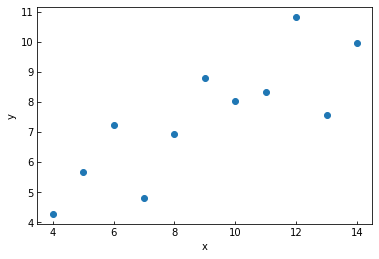

In [18]:
fig = pyplot.figure()
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(x, y)
print(reduced_dataset)

<AxesSubplot:xlabel='x', ylabel='y'>

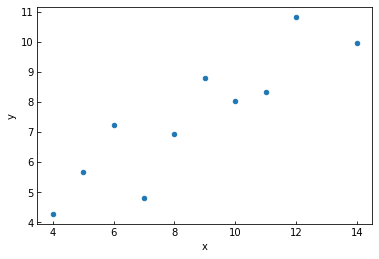

In [19]:
without_outliers = reduced_dataset.drop(reduced_dataset.index[2])

fig = pyplot.figure()
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')
ax.set_xlabel('x')
ax.set_ylabel('y')
without_outliers.plot(x='x',y='y',kind='scatter',ax=ax)